In [6]:
import numpy as np
import matplotlib.pyplot as plt
import csiborgtools

from hmf import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
bin_edges = np.arange(11.8, 15.2, 0.25)
xbin = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_edges = 10**bin_edges
xbin = 10**xbin

paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)

In [23]:
hmf_cb2_main = calculate_hmf("csiborg2_main", bin_edges)
hmf_cb2_random = calculate_hmf("csiborg2_random", bin_edges)
hmf_cb2_varysmall = calculate_hmf("csiborg2_varysmall", bin_edges)
hmf_mpdpl2 = MDPL2_HMF(bin_edges)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:05<00:00,  3.85it/s]


## CB2_varysmall HMF

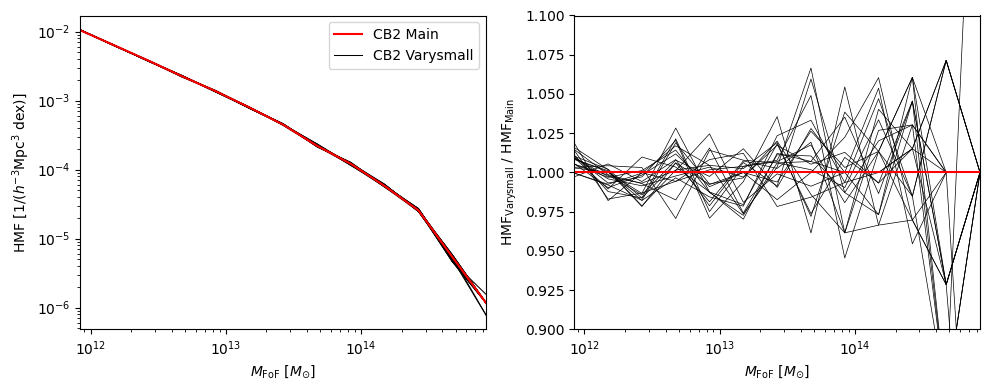

In [25]:
k = np.where(paths.get_ics("csiborg2_main") == 16417)[0][0]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
lw = plt.rcParams['lines.linewidth']
fig.subplots_adjust(hspace=0)
axs[0].plot(xbin, hmf_cb2_main[k], zorder=1, color="red", label="CB2 Main")
for i in range(len(hmf_cb2_varysmall)):
    axs[0].plot(xbin, hmf_cb2_varysmall[i], lw=lw/2, color="black", zorder=0,
                label="CB2 Varysmall" if i == 0 else None)

    axs[1].plot(xbin, hmf_cb2_varysmall[i] / hmf_cb2_main[k], lw=lw/3, color="black", zorder=0)


xmin, xmax = xbin.min(), xbin.max()
for i in range(2):
    axs[i].set_xscale("log")
    axs[i].set_xlabel(r"$M_{\mathrm{FoF}}$ $[M_{\odot}]$")
    axs[i].set_xlim(xmin, xmax)

axs[0].legend()
axs[0].set_ylabel(r"HMF $[1 / (h^{-3} \mathrm{Mpc}^3~\mathrm{dex})]$")
axs[1].set_ylabel(r"$\mathrm{HMF}_{\mathrm{Varysmall}}~/~\mathrm{HMF}_{\mathrm{Main}}$")
axs[0].set_yscale("log")
axs[1].set_ylim(0.9, 1.1)
axs[1].axhline(1, color="red", lw=lw, zorder=0)

fig.tight_layout()
fig.savefig("../../plots/varysmall_hmf.png", dpi=450)
fig.show()

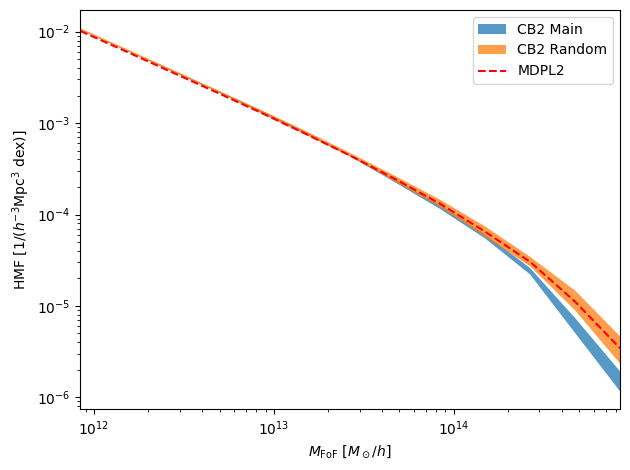

In [24]:
plt.figure()

ylow, yhigh = np.percentile(hmf_cb2_main, [16, 84], axis=0)
plt.fill_between(xbin, ylow, yhigh, alpha=0.75, label="CB2 Main")

ylow, yhigh = np.percentile(hmf_cb2_random, [16, 84], axis=0)
plt.fill_between(xbin, ylow, yhigh, alpha=0.75, label="CB2 Random")

plt.plot(xbin, hmf_mpdpl2, label="MDPL2", color="red", ls="--")

plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$M_{\rm FoF} ~ [M_\odot / h]$")
plt.ylabel(r"HMF $[1 / (h^{-3} \mathrm{Mpc}^3~\mathrm{dex})]$")
plt.legend()
plt.xlim(xbin.min(), xbin.max())

plt.tight_layout()
plt.savefig("../../plots/HMF_comparison.png", dpi=450)
plt.show()